In [1]:
# thank you to Peter Yoachim for getting tutorial notebook updated:
# https://github.com/lsst/rubin_sim_notebooks/blob/main/scheduler/3-MDP_surveys.ipynb

# started by doing a `pip install rubin-scheduler`
# and then in command line ran: scheduler_download_data

In [15]:
from rubin_scheduler.scheduler.utils import CurrentAreaMap, Footprint, make_rolling_footprints, 
from rubin_scheduler.scheduler.model_observatory import ModelObservatory

import healpy as hp
%matplotlib inline
import numpy as np

# import rubin_scheduler.scheduler.basis_functions as bf
# from rubin_scheduler.scheduler.surveys import BlobSurvey
# from rubin_scheduler.scheduler.schedulers import CoreScheduler
# from rubin_scheduler.scheduler import sim_runner
from rubin_scheduler.utils import DEFAULT_NSIDE, ra_dec2_hpid, hpid2_ra_dec

# from rubin_scheduler.scheduler.basis_functions import BaseBasisFunction

import matplotlib.pylab as plt

In [12]:
sag = CurrentAreaMap(nside=64)
sky_maps, labels = sag.return_maps()

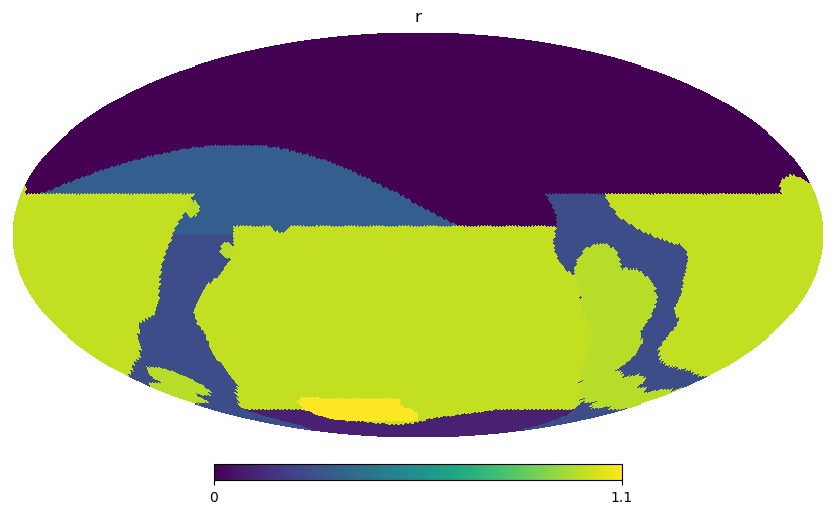

In [13]:
hp.mollview(sky_maps['r'], title='r',)

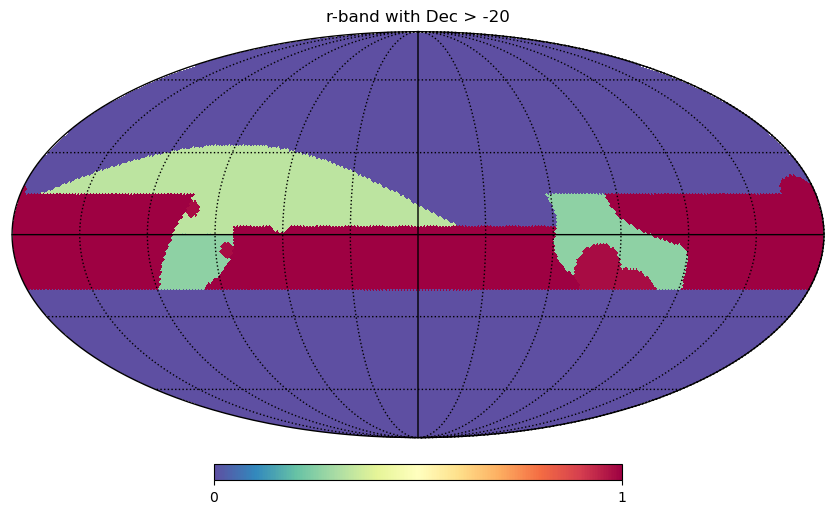

In [103]:
from rubin_scheduler.scheduler.utils import CurrentAreaMap, Footprint
from rubin_scheduler.utils import DEFAULT_NSIDE, ra_dec2_hpid, hpid2_ra_dec
import healpy as hp
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

# Your working code:
sag = CurrentAreaMap(nside=64)
sky_maps, labels = sag.return_maps()

nside = 64
npix = hp.nside2npix(nside)

# Get (theta, phi) for all pixels
theta, phi = hp.pix2ang(nside, np.arange(npix))
dec_deg = 90.0 - np.degrees(theta)

# Build a mask for pixels with Dec > -20
mask_dec = np.int32(dec_deg > -20)

hp.mollview(sky_maps['r']*mask_dec, title="r-band with Dec > -20", min=0, cmap=plt.cm.Spectral_r)
hp.graticule()


In [98]:
from mocpy import MOC, WCS

In [ ]:
MOC.from_valued_healpix_cells

In [99]:
npix

49152

In [101]:
nside = 64
npix = hp.nside2npix(nside)
coverage_map = np.zeros(npix, dtype=float)
# Let's pretend half the sky is covered:
coverage_map[: npix//2] = 1.0

# 1) Decide how to interpret "in coverage" vs. "out of coverage."
#    Typically, MOC is a *mask* (binary). So let's define "in coverage" as > 0.
ipix_covered = np.where(coverage_map > 0)[0]

# 2) Build the MOC from these pixel indices
moc = MOC.from_healpix_cells(nside, ipix_covered, max_depth=8)


AttributeError: 'int' object has no attribute 'astype'

0 
1 LMC_SMC
2 bulgy
3 dusty_plane
4 euclid_overlap
5 lowdust
6 nes
7 scp
8 virgo


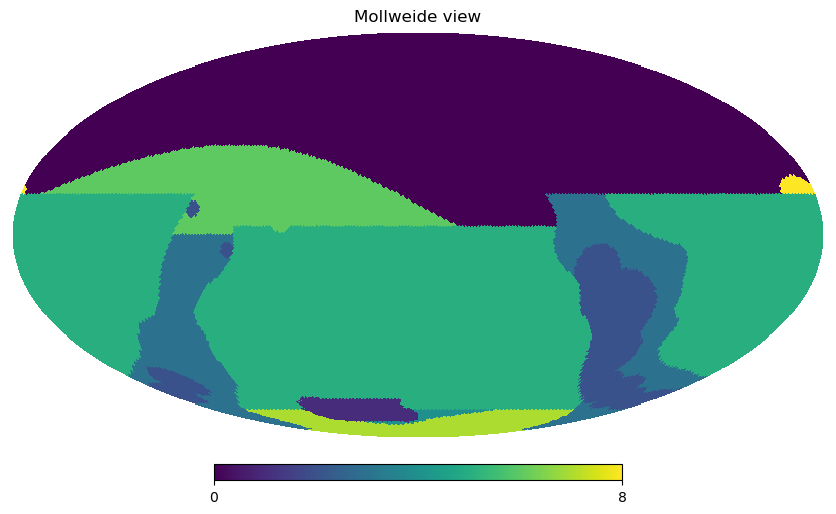

In [14]:
# Look at the labels
label_int = np.zeros(hp.nside2npix(64))
for i,label in enumerate(np.unique(labels)):
    indx = np.where(labels == label)[0]
    label_int[indx] = i
    print(i, label)
hp.mollview(label_int)

In [33]:
ra, dec = hpid2_ra_dec(64, np.arange(hp.nside2npix(64)))
# ra, dec = hpid2_ra_dec(64, labels)

In [52]:
aok = np.where((dec > -20))

hpindx = ra_dec2_hpid(64, ra[aok], dec[aok])

In [56]:
# hp.mollview(hpindx)
hp.mollview(sky_maps['r'][hpindx], title='r',)

TypeError: bad number of pixels

In [49]:
ra.size

49152

In [46]:
sky_maps['r'].size

49152

In [48]:
hpindx.size

32896

In [55]:
aok

(array([    0,     1,     2, ..., 32893, 32894, 32895]),)

In [87]:
from rubin_scheduler.scheduler.utils import Footprint, CurrentAreaMap
import numpy as np
import healpy as hp

nside = 64
mjd_start = 59853.5  # example MJD

footprint = Footprint(
    nside=nside,
    mjd_start=mjd_start
    # sun_RA_start may be unnecessary or removed in your version
)

footprint_map = CurrentAreaMap(nside=64)

# e.g. impose Dec > -20
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
dec_deg = 90 - np.degrees(theta)
mask = dec_deg > -20
# footprint_map[mask] = 0.0

hp.mollview(footprint_map, title="Footprint w/ Dec > -20", min=0, max=1)
hp.graticule()


TypeError: input map is a scalar